In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\GreatLakes\Capstone_project\Flight_ticket_price.csv")

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,Class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
# Dropping the unnamed:0
del df['Unnamed: 0']

In [5]:
df.shape

(300153, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   Class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
df.corr(numeric_only=True)

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [8]:
df.describe(include=object)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,Class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


### Identifying Missing Values

In [9]:
df.isnull().sum()
# no missing values were found in the dataset

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
Class               0
duration            0
days_left           0
price               0
dtype: int64

### Identifying duplicate values 

In [10]:
df[df.duplicated()]
# no duplicate values were found

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,Class,duration,days_left,price


In [11]:
df.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,Class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


In [12]:
# Segregating numerical and categorical attributes
num_cols = ['duration','days_left']
cat_cols = ['airline' ,'source_city' ,'departure_time' ,'stops' ,'arrival_time' ,'destination_city' ,'Class']

### Univariate Analysis

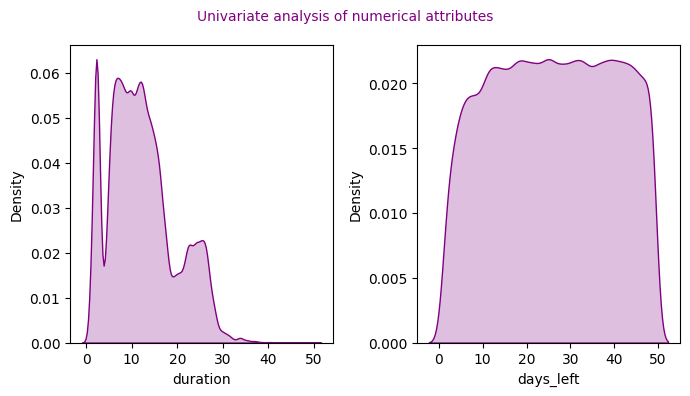

In [13]:
t = 1
plt.figure(figsize=(7,4))
plt.suptitle('Univariate analysis of numerical attributes', color = 'purple', fontsize = 10)
for i in num_cols:
    plt.subplot(1,2,t)
    sns.kdeplot(df, x = i, fill=True, color = 'purple')
    plt.xlabel(i)
    t = t+1
plt.tight_layout()
plt.show()

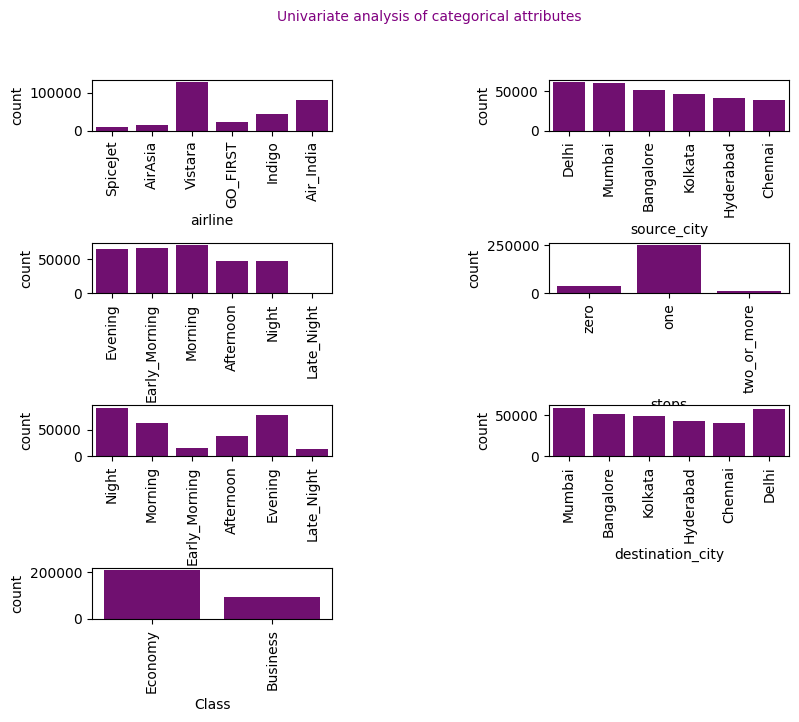

In [14]:
t = 1
plt.figure(figsize=(9,7))
plt.suptitle('Univariate analysis of categorical attributes', color = 'purple', fontsize = 10)
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(df, x = i, color = 'purple')
    plt.xlabel(i)
    plt.xticks(rotation=90)
    t = t+1
plt.subplots_adjust(hspace=2.2, wspace=0.9)
plt.show()

<Axes: xlabel='airline'>

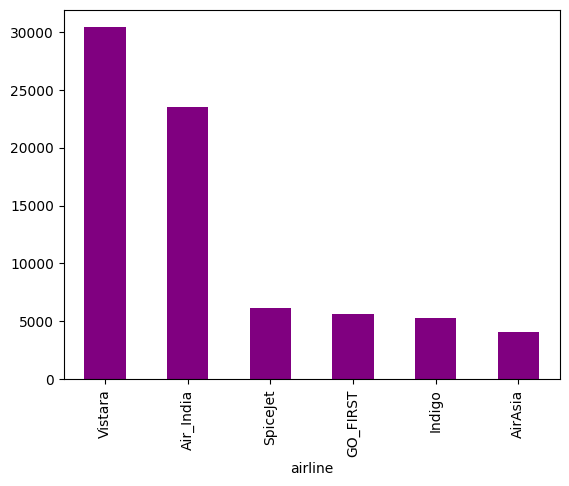

In [15]:
 df.groupby(by = 'airline')['price'].mean().sort_values(ascending=False).plot(kind = 'bar', color = 'purple')

<Axes: xlabel='source_city'>

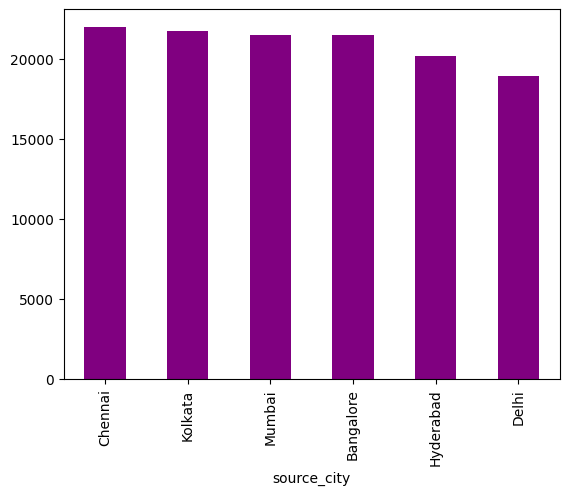

In [16]:
df.groupby(by = 'source_city')['price'].mean().sort_values(ascending=False).plot(kind = 'bar', color = 'purple')

<Axes: xlabel='departure_time'>

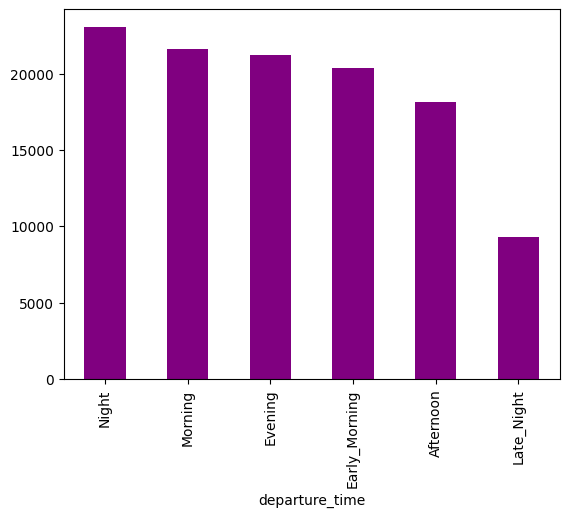

In [17]:
df.groupby(by = 'departure_time')['price'].mean().sort_values(ascending=False).plot(kind = 'bar', color = 'purple')

<Axes: xlabel='stops'>

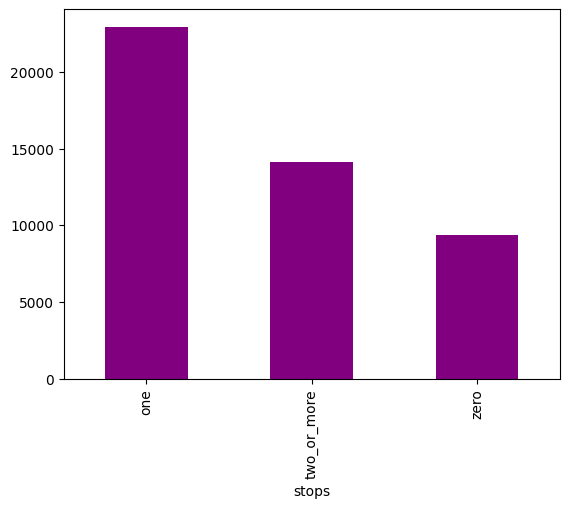

In [18]:
df.groupby(by = 'stops')['price'].mean().sort_values(ascending=False).plot(kind = 'bar', color = 'purple')

<Axes: xlabel='arrival_time'>

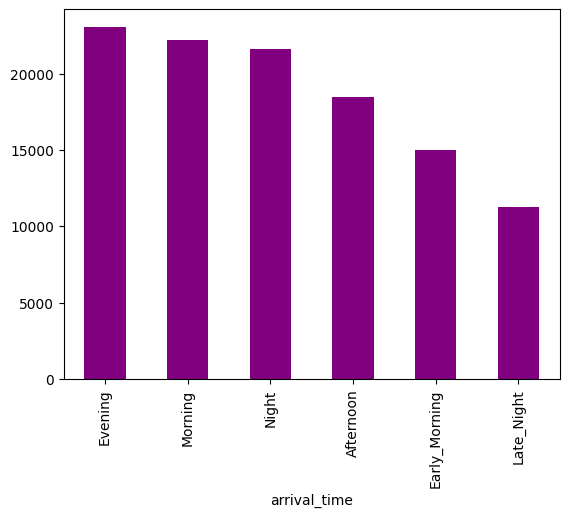

In [19]:
df.groupby(by = 'arrival_time')['price'].mean().sort_values(ascending=False).plot(kind = 'bar', color = 'purple')

<Axes: xlabel='destination_city'>

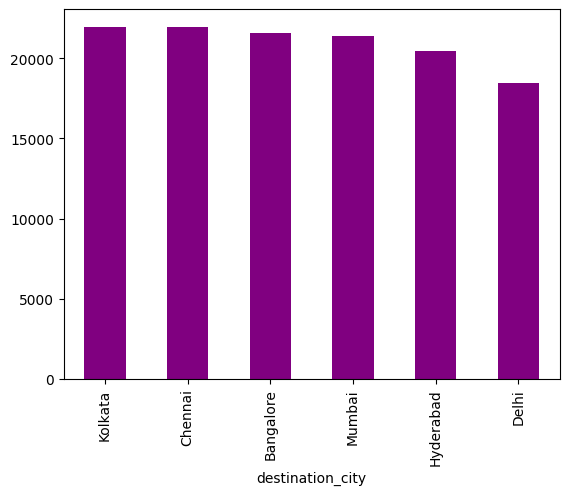

In [20]:
df.groupby(by = 'destination_city')['price'].mean().sort_values(ascending=False).plot(kind = 'bar', color = 'purple')

<Axes: xlabel='Class'>

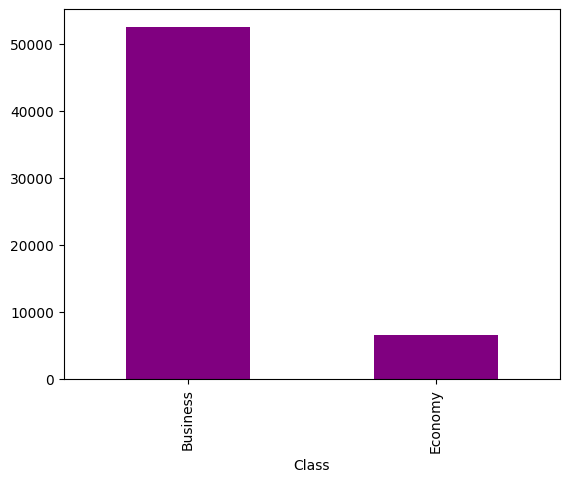

In [21]:
df.groupby(by = 'Class')['price'].mean().sort_values(ascending=False).plot(kind = 'bar', color = 'purple')

### Hypothesis testing for categorical columns

In [22]:
import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

In [23]:
model = sfa.ols('price~airline+source_city+departure_time+stops+arrival_time+destination_city+Class',df).fit()

In [24]:
print(anova_lm(model))

                        df        sum_sq       mean_sq             F  \
airline                5.0  3.443051e+13  6.886101e+12  1.410006e+05   
source_city            5.0  3.168568e+11  6.337135e+10  1.297599e+03   
departure_time         5.0  4.523491e+10  9.046981e+09  1.852470e+02   
stops                  2.0  2.770265e+12  1.385132e+12  2.836212e+04   
arrival_time           5.0  1.467509e+11  2.935017e+10  6.009773e+02   
destination_city       5.0  5.665196e+11  1.133039e+11  2.320023e+03   
Class                  1.0  1.017015e+14  1.017015e+14  2.082451e+06   
Residual          300124.0  1.465728e+13  4.883740e+07           NaN   

                         PR(>F)  
airline            0.000000e+00  
source_city        0.000000e+00  
departure_time    1.134171e-197  
stops              0.000000e+00  
arrival_time       0.000000e+00  
destination_city   0.000000e+00  
Class              0.000000e+00  
Residual                    NaN  


### Hypothesis Testing of numerical columns with target column

In [25]:
stats.mannwhitneyu(df['duration'], df['price'], alternative='two-sided')

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [26]:
stats.ttest_ind(df['duration'], df['price'], alternative='two-sided')

TtestResult(statistic=-503.9244329359575, pvalue=0.0, df=600304.0)

In [27]:
stats.mannwhitneyu(df['days_left'], df['price'], alternative='two-sided')

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [28]:
stats.ttest_ind(df['days_left'], df['price'], alternative='two-sided')

TtestResult(statistic=-503.59166669505686, pvalue=0.0, df=600304.0)

### Encoding

In [29]:
df.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,Class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


In [30]:
df['airline'].unique()
df['airline'] = df['airline'].map(df['airline'].value_counts(normalize=True).to_dict())

In [31]:
df['flight'] = df['flight'].map(df['flight'].value_counts(normalize=True).to_dict())

In [32]:
df['source_city'].unique()
df['source_city'] = df['source_city'].map(df['source_city'].value_counts(normalize=True).to_dict())

In [33]:
df['departure_time'].unique()
df['departure_time'] = df['departure_time'].map(df['departure_time'].value_counts(normalize=True).to_dict())

In [34]:
df['stops'].unique()
df = pd.get_dummies(df, columns = ['stops'], drop_first=True, dtype=int)

In [35]:
df['arrival_time'].unique()
df['arrival_time'] = df['arrival_time'].map(df['arrival_time'].value_counts(normalize=True).to_dict())

In [36]:
df['destination_city'].unique()
df['destination_city'] = df['destination_city'].map(df['destination_city'].value_counts(normalize=True).to_dict())

In [37]:
df = pd.get_dummies(df, columns = ['Class'], drop_first=True, dtype=int)

### Splitting the data

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x = df.drop('price', axis =1)
y = df['price']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=43, train_size=0.7)

In [41]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(210107, 11) (90046, 11) (210107,) (90046,)


### Identifying Outliers

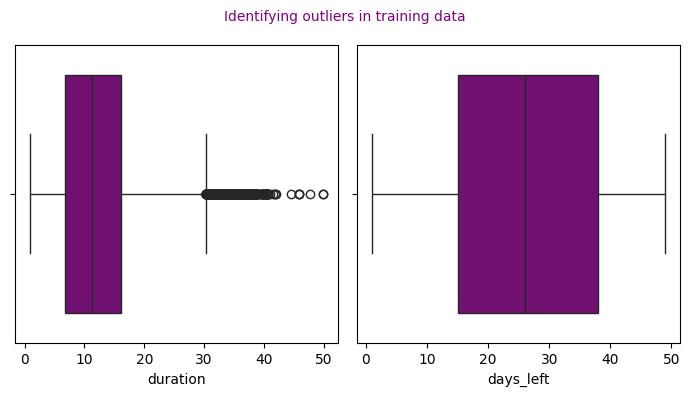

In [42]:
t = 1
plt.figure(figsize=(7,4))
plt.suptitle('Identifying outliers in training data', color = 'purple', fontsize = 10)
for i in num_cols:
    plt.subplot(1,2,t)
    sns.boxplot(x_train, x = i, fill=True, color = 'purple')
    plt.xlabel(i)
    t = t+1
plt.tight_layout()
plt.show()

# Outliers are found in duration column only and we will cap outliers below 40, rest we will keep in the dataset

In [43]:
x_train['duration'] = x_train['duration'].transform(lambda x: 40 if 40>x>30 else x)

<Axes: xlabel='duration'>

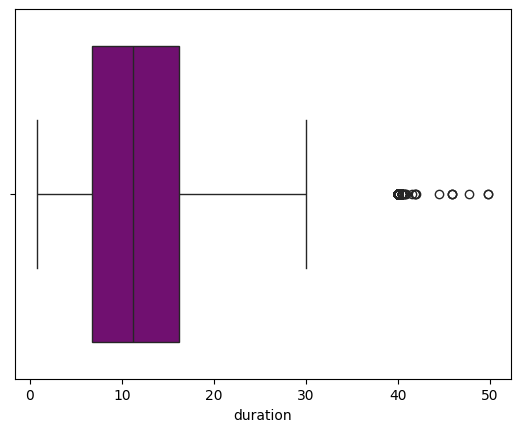

In [44]:
sns.boxplot(x=  x_train['duration'], color ='purple')

### Modelling

### Linear Regression (Base Model)

In [63]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [46]:
lr = LinearRegression()
model_lr = lr.fit(x_train,y_train)

In [47]:
y_pred_lr = model_lr.predict(x_test)

In [48]:
model_lr.score(x_train,y_train)

0.9055614169184393

In [49]:
model_lr.score(x_train,y_train)

0.9055614169184393

In [50]:
print(f'R2_Score: {r2_score(y_test,y_pred_lr)}')
print(f'MSE : {mean_squared_error(y_test,y_pred_lr)}')
print(f'RMSE : {mean_squared_error(y_test,y_pred_lr, squared=False)}')
print(f'MAE : {mean_absolute_error(y_test,y_pred_lr)}')

R2_Score: 0.905629851950137
MSE : 48623339.07791177
RMSE : 6973.043745589996
MAE : 4575.461350815573


In [51]:
cross_val_score(estimator=LinearRegression(), X= x_train, y=y_train , scoring='r2', cv=7)

array([0.90358844, 0.90685207, 0.9050496 , 0.90563952, 0.9095254 ,
       0.90471639, 0.90346272])

In [53]:
print(f'r2_score: {r2_score(y_train, model_lr.predict(x_train))}')

r2_score: 0.9055614169184393


### Decision Tree Regressor using GridSeachCV

In [54]:
DecisionTreeRegressor()
grid = {'max_depth': [4,5,6], 'min_samples_split': [10,20,30]}
gscv = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=grid, cv=5, scoring='r2')
model_cv = gscv.fit(x_train, y_train)

In [55]:
model_cv.best_params_

{'max_depth': 6, 'min_samples_split': 30}

In [58]:
dt = DecisionTreeRegressor(**model_cv.best_params_)
model_dt = dt.fit(x_train,y_train)

In [59]:
y_pred_dt = model_dt.predict(x_test)

In [60]:
print(f'R2_Score: {r2_score(y_test,y_pred_dt)}')
print(f'MSE : {mean_squared_error(y_test,y_pred_dt)}')
print(f'RMSE : {mean_squared_error(y_test,y_pred_dt, squared=False)}')
print(f'MAE : {mean_absolute_error(y_test,y_pred_dt)}')

R2_Score: 0.9483532528918502
MSE : 26610505.00401722
RMSE : 5158.537099218849
MAE : 2970.244941331558


In [61]:
cross_val_score(estimator=DecisionTreeRegressor(max_depth= 6, min_samples_split= 30), X= x_train, y=y_train , scoring='r2', cv=7)

array([0.94861824, 0.95056453, 0.94893684, 0.94791174, 0.9502046 ,
       0.94824364, 0.94855669])

In [62]:
print(f'r2_score: {r2_score(y_train, model_dt.predict(x_train))}')

r2_score: 0.9491896699051184


### Ridge using GridSearchCV

In [75]:
rd = Ridge()
grid1 = {'alpha':[1,1.5,2,2.5]}
gscv1 = GridSearchCV(estimator=Ridge(), param_grid=grid1, cv=5, scoring='r2')
model_cv1 = gscv1.fit(x_train,y_train)

In [76]:
model_cv1.best_params_

{'alpha': 1}

In [77]:
rd = Ridge(alpha=1)
model_rd = rd.fit(x_train,y_train)

In [78]:
y_pred_rd = model_rd.predict(x_test)

In [79]:
print(f'R2_Score: {r2_score(y_test,y_pred_rd)}')
print(f'MSE : {mean_squared_error(y_test,y_pred_rd)}')
print(f'RMSE : {mean_squared_error(y_test,y_pred_rd, squared=False)}')
print(f'MAE : {mean_absolute_error(y_test,y_pred_rd)}')

R2_Score: 0.905245392581476
MSE : 48821428.18374015
RMSE : 6987.233228091084
MAE : 4574.49391572956


### XGBRegressor using GridSearchCV

In [82]:
grid2 = {'max_depth':[3,4,5],'learning_rate': [0.1,0.2,0.3],'gamma':[1.0,1.5,2.0]}
gscv2 = GridSearchCV(estimator=XGBRegressor(n_estimators =100), param_grid=grid2, cv=5, scoring='r2')
model_cv2 = gscv2.fit(x_train,y_train)

In [83]:
model_cv2.best_params_

{'gamma': 1.0, 'learning_rate': 0.3, 'max_depth': 5}

In [84]:
xgb= XGBRegressor(n_estimators =100,gamma= 1.0, learning_rate=0.3,max_depth=5 )
model_xgb = xgb.fit(x_train, y_train)

In [85]:
y_pred_xgb = model_xgb.predict(x_test)

In [86]:
print(f'R2_Score: {r2_score(y_test,y_pred_xgb)}')
print(f'MSE : {mean_squared_error(y_test,y_pred_xgb)}')
print(f'RMSE : {mean_squared_error(y_test,y_pred_xgb, squared=False)}')
print(f'MAE : {mean_absolute_error(y_test,y_pred_xgb)}')

R2_Score: 0.979198203588296
MSE : 10717931.689812994
RMSE : 3273.8252381293955
MAE : 1899.6963823158897


In [87]:
cross_val_score(estimator=XGBRegressor(n_estimators =100,gamma= 1.0, learning_rate=0.3,max_depth=5 ), X= x_train, y=y_train, cv=7, scoring='r2')

array([0.97870814, 0.9793367 , 0.97878276, 0.97875533, 0.97957465,
       0.9775808 , 0.97903999])